# 📊 Análisis Univariante con Pandas

El análisis univariante consiste en estudiar cada variable por separado para entender su comportamiento, distribución y posibles valores atípicos. Es el primer paso en cualquier proceso de análisis de datos, ya que nos da una visión clara de la estructura del dataset y nos ayuda a detectar problemas como valores nulos, datos desbalanceados o errores tipográficos.

## 📦 Carga de librerías
Usaremos las librerías más comunes para análisis de datos y visualización: `pandas`, `numpy`, `seaborn` y `matplotlib`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 📂 Carga del dataset
Para este análisis usaremos el dataset **Titanic**, que viene incluido en Seaborn. Contiene información de los pasajeros del famoso barco, incluyendo edad, clase, género, tarifa, entre otros.

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 🔍 Exploración inicial del dataset
Antes de analizar variable por variable, es importante revisar la estructura general del dataset:

In [3]:
df.info()  # Tipos de datos y nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe(include="all")  # Estadísticas descriptivas globales

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🔢 Variables Numéricas: Análisis estadístico
Empezamos con las variables numéricas. En este caso, `age` y `fare` son dos variables continuas interesantes.

In [5]:
df[["age", "fare"]].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## 📊 Distribución de la edad
Analizamos visualmente la distribución de la edad de los pasajeros.

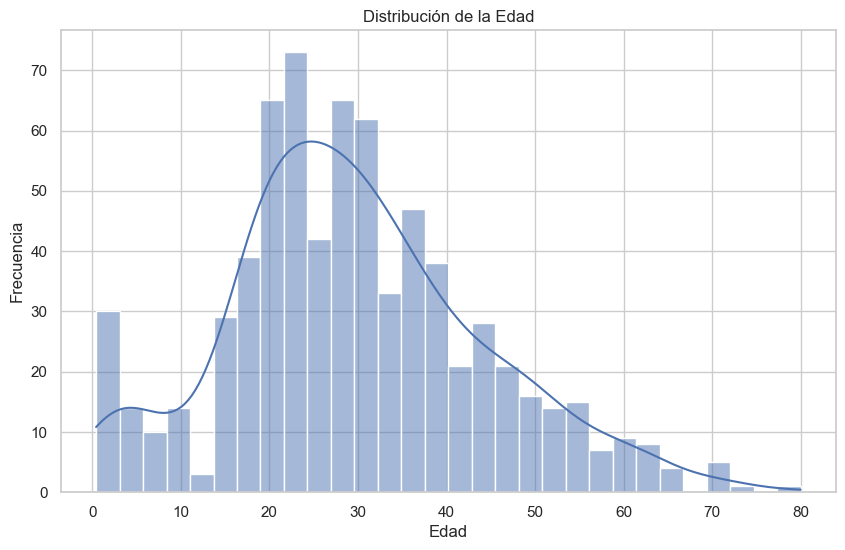

In [6]:
sns.histplot(df["age"].dropna(), kde=True, bins=30)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

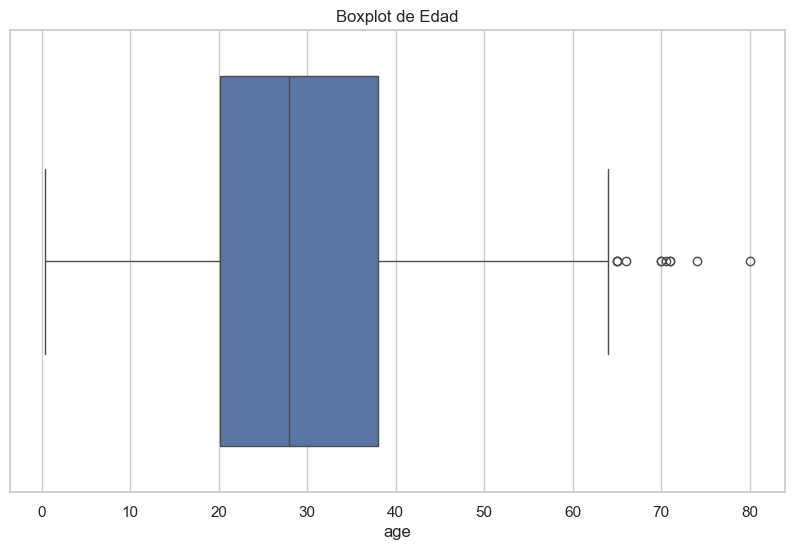

In [7]:
sns.boxplot(x=df["age"])
plt.title("Boxplot de Edad")
plt.show()

## 📈 Media de edad por clase
Agrupamos los pasajeros por clase (`class`) y calculamos la media de edad. Esto puede mostrar diferencias socioeconómicas.

In [10]:
df.groupby("class")["age"].mean().sort_index()

C:\Users\jdiezo\AppData\Local\Temp\ipykernel_11048\2799026602.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("class")["age"].mean().sort_index()


class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

## 🧪 Función auxiliar para análisis numérico
Creamos una función para analizar cualquier variable numérica de forma rápida:

In [ ]:
def explorar_variable_numerica(serie):
    """
    Explora una variable numérica mostrando:
    - Estadísticas descriptivas básicas
    - Conteo de nulos y valores únicos
    - Histograma con densidad
    - Boxplot para detección visual de outliers

    Parámetros:
    serie (pd.Series): Columna numérica de un DataFrame
    """
    
    # Descripción estadística básica
    print("📊 Descripción estadística:")
    display(serie.describe())  # count, mean, std, min, 25%, 50%, 75%, max

    # Conteo de valores nulos y únicos
    print("\n❓ Valores nulos:", serie.isnull().sum())
    print("🔢 Valores únicos:", serie.nunique())

    # Histograma con curva de densidad (KDE)
    print("\n📈 Histograma:")
    sns.histplot(serie.dropna(), kde=True, bins=30)
    plt.xlabel(serie.name)
    plt.title(f"Distribución de '{serie.name}'")
    plt.show()

    # Boxplot para ver outliers y cuartiles
    print("\n📦 Boxplot:")
    sns.boxplot(x=serie.dropna())
    plt.xlabel(serie.name)
    plt.title(f"Boxplot de '{serie.name}'")
    plt.show()


Descripción estadística:


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


Valores nulos: 0
Valores únicos: 248

Histograma:


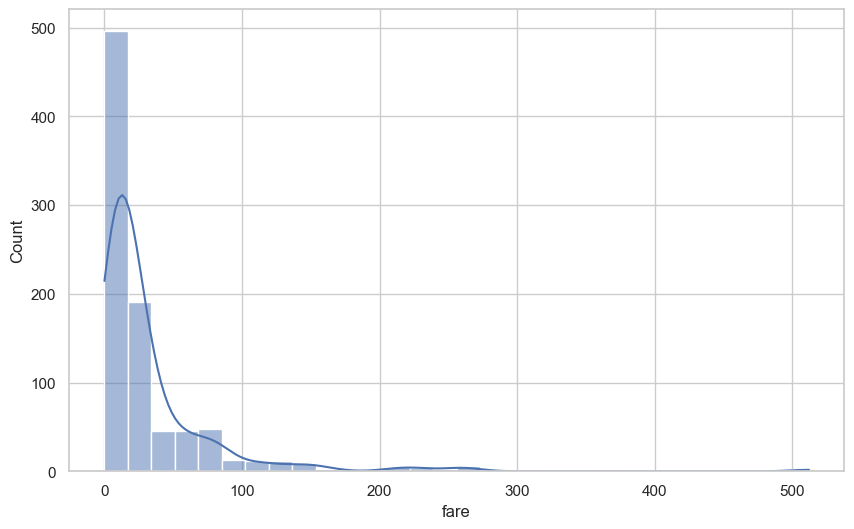


Boxplot:


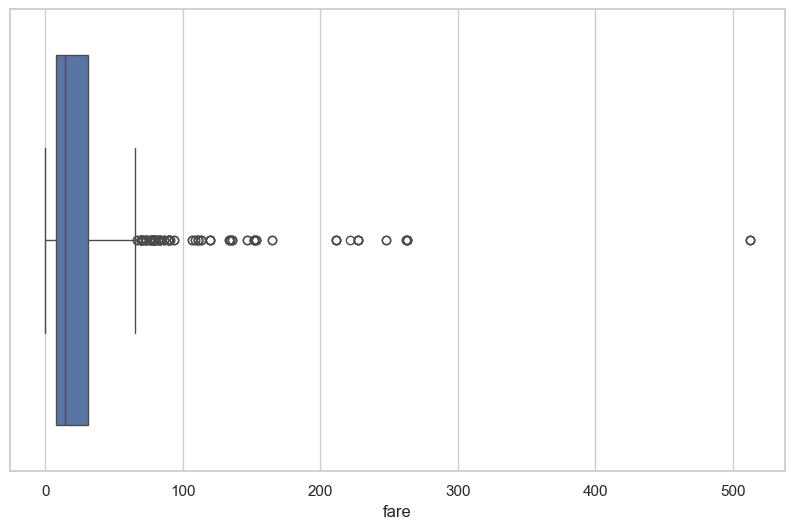

In [12]:
# Ejemplo con la variable 'fare'
explorar_variable_numerica(df["fare"])

## 🔤 Variables Categóricas: Análisis de frecuencias
Ahora revisamos algunas variables categóricas como `sex`, `embarked` o `class`.

In [13]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

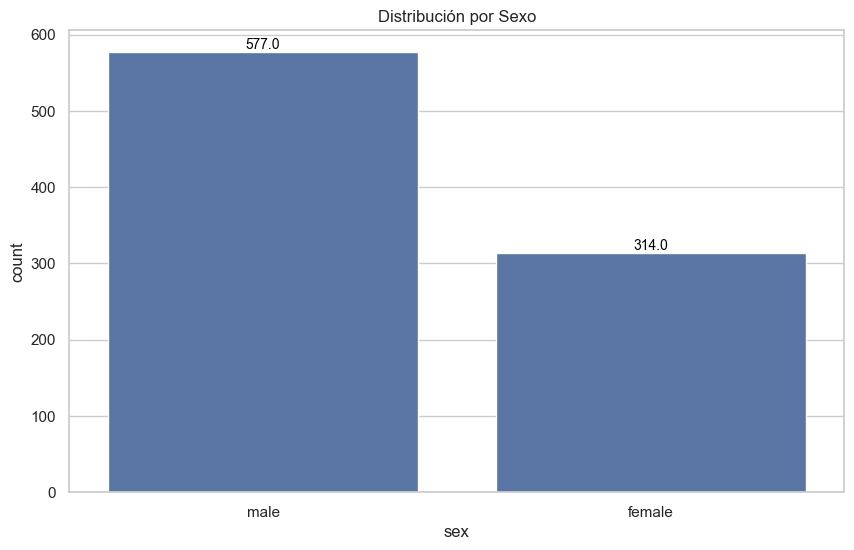

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="sex", data=df)
plt.title("Distribución por Sexo")

# Añadir etiquetas con los valores a cada barra
ax = plt.gca()  # Obtener el eje actual
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [15]:
df["embarked"].value_counts(dropna=False)

embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

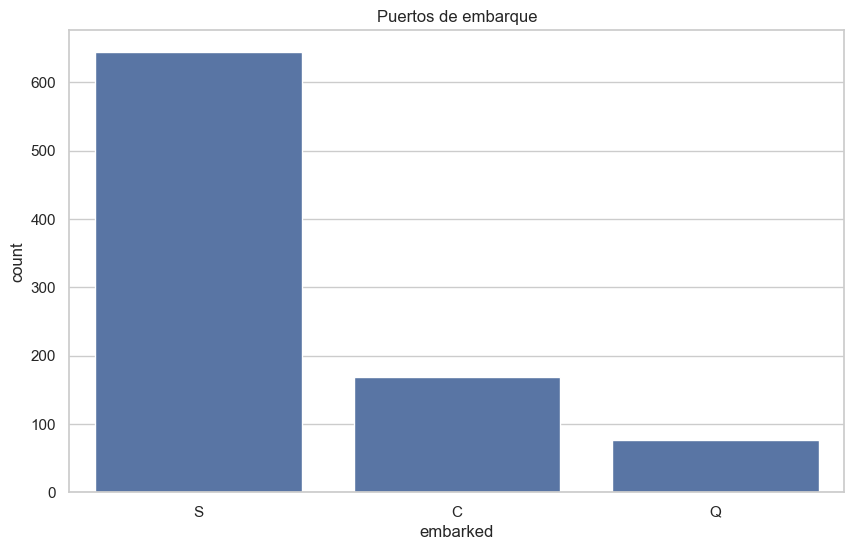

In [16]:
sns.countplot(x="embarked", data=df)
plt.title("Puertos de embarque")
plt.show()

## 💡 Consideraciones importantes
- Las variables con muchos nulos deben ser tratadas antes del modelado.
- Las variables categóricas deben revisarse por posibles errores de escritura o capitalización.
- El análisis univariante también ayuda a decidir qué transformaciones aplicar más adelante (escalados, normalizaciones, codificación, etc.).

## ✅ Conclusiones del análisis univariante
El análisis univariante es esencial para comprender cada variable de forma aislada. Nos permite:
- Detectar distribuciones sesgadas o valores atípicos.
- Entender la calidad de los datos y el número de valores faltantes.
- Establecer una base sólida antes de pasar a análisis más complejos como el bivariante o multivariante.

## 🕳️ Análisis de valores nulos
Es importante identificar qué variables tienen valores faltantes, ya que esto puede influir en la calidad del análisis o en modelos posteriores. Vamos a calcular el porcentaje de valores nulos por columna.

In [17]:
# Porcentaje de valores nulos por columna
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64

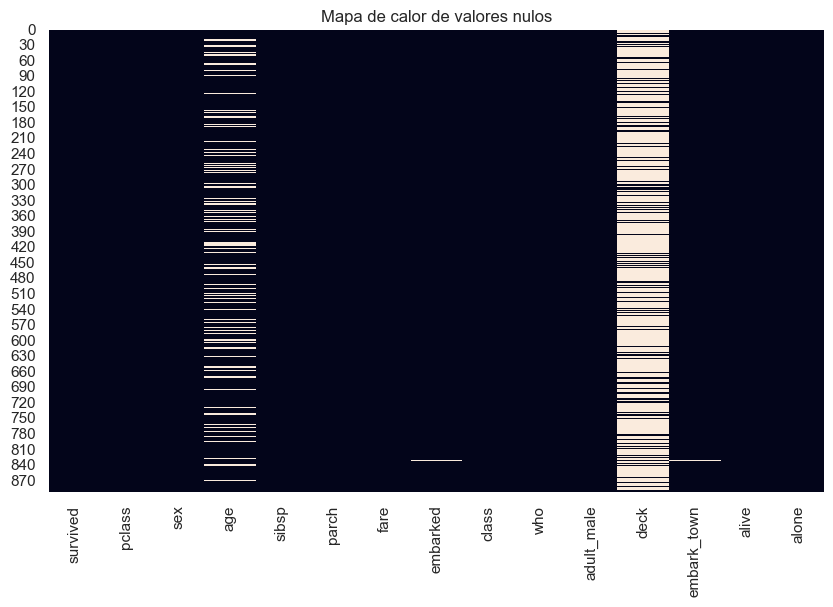

In [20]:
# Mapa de calor de valores nulos
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

## 📉 Detección de variables con sesgo
Algunas variables pueden tener una distribución muy asimétrica. Por ejemplo, `fare` tiene valores muy altos que pueden afectar el análisis. Podemos aplicar una transformación logarítmica para ver si mejora su distribución.

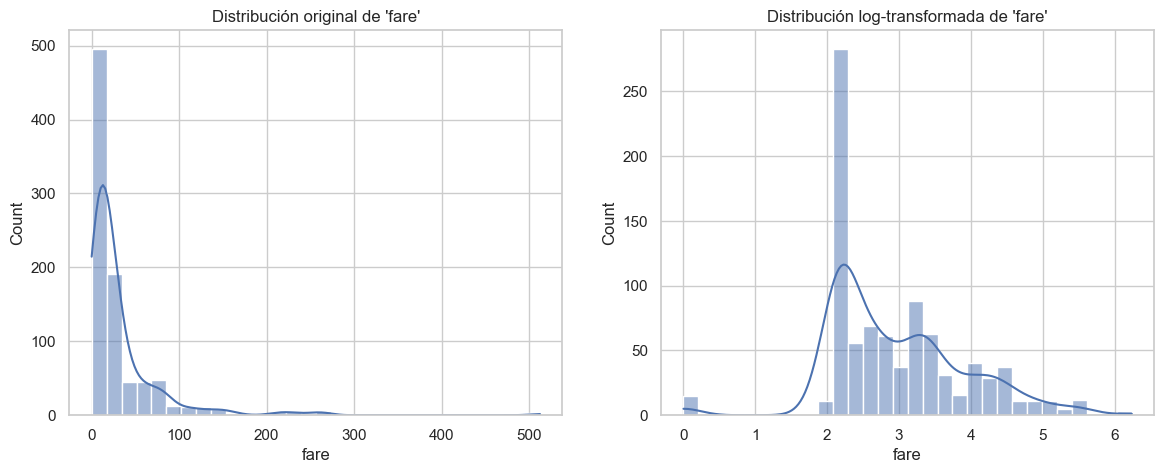

In [21]:
# Comparación de la variable 'fare' antes y después de log-transformación
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["fare"].dropna(), bins=30, ax=axes[0], kde=True)
axes[0].set_title("Distribución original de 'fare'")

sns.histplot(np.log1p(df["fare"].dropna()), bins=30, ax=axes[1], kde=True)
axes[1].set_title("Distribución log-transformada de 'fare'")
plt.show()

## 🧾 Resumen del análisis univariante

El análisis univariante es el primer paso fundamental en todo proceso de análisis exploratorio de datos. Nos permite:

- Comprender la distribución y estructura de cada variable.
- Detectar problemas de calidad como nulos, duplicados o categorías inconsistentes.
- Establecer la base para el análisis bivariante y multivariante posterior.

Realizar un buen análisis univariante asegura que cualquier modelo o análisis posterior esté construido sobre un entendimiento sólido de los datos.